# Basics of Convolutional Neural Networks
# Project Description
In this notebook I will go over some of the basics of convolutional neural networks. This notebook will cover what a convolution is, kernels/filters, max/min pooling etc. At the end of explaining the basics I will build a convolutional neural network using pytorch to classify some images. I am doing this project because I wanted to learn how to use pytorch while also implementing and learning about convolutional neural networks. Some knowledge of neural networks would be helpful for this project as well as some python knowledge. If you want to learn more about neural networks I have a notebook where I explain the math and implement one from scrath [here](https://github.com/GaelGil/notebooks/blob/master/convolutions/convolutuionExample.ipynb).

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CNN Architecture
Just like in regular feed forward neural networks, in convolutional networks we also have layers. We have the convolutional layer, pooling layer, activation layer and the feed forward part of our network. This is a photo of what it looks like. We will go over each part later in the notebook.
## What is a convolution?
Lets start of with what a convolution is.  A convolution in math is when we combine two functions to get a third one. The convolution of the function $f$ and $g$ is given by 

$$ (f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau$$

In convolutional neural networks we have an image which is a matrix and a kernel/filter which is also a matrix. So what we will do is pass a kernel over the image multiplying them and adding to get another image. This is our convolution. I will demonstrate this more later. 

What convolutions do is help us extract features from an image. These features will help us classify our image. For example let's say we have a black and white image of the letter X. The kernel would pick up on the diagonal lines of the image and move that forward in the network. If we had an image of the letter O. The kernels would pick up on the curves of the letter and pass those features forward.

With each iteration the kernels will pick up on features that will help us make a prediction. Essentially the convolutons are telling us what in this image is significant. This is feature extraction. Now the important thing is that we have to learn the correct value for the weights in the kernel so that we can get those important features. 

## What is a kernel?
As mentioned a **kernel is a matrix** that we multiply accross an image to perform a convolution. Each kernel will learn to extract important features from our image. After applying the kernel to our image we will end up with another matrix which is the features our filter has extracted. Here is an example of a 3x3 kernel.

In [8]:
kernel = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])

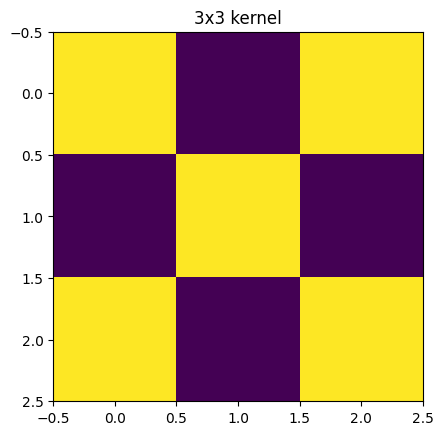

In [9]:
plt.imshow(kernel, cmap="viridis")  # 'viridis' is a common colormap
plt.title('3x3 kernel')
plt.show()

Here is an example of an image, it vaguely looks like a 7. In this case we have one channel. If we had a colored image we would have 3 channels. One for red, green and blue, each its own matrix. Becuase we have one channel (matrix) our image is a gray scale image. Each pixel would be a value between 0 and 1 where 0 is black and 1 is white. For simplicity I made them all 1 and 0.

In [20]:
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 1, 1, 0],
                [0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

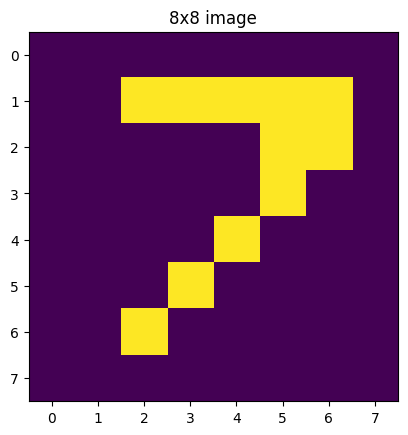

In [22]:
plt.imshow(img, cmap="viridis")
plt.title('8x8 image')
plt.show()

Lets perform the convolution of our image and our kernel.

In [ ]:
def convolve2d(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))

    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.sum(img[y:y+kernel_height, x:x+kernel_width] * kernel)
    
    return output

ValueError: object too deep for desired array

Since we went over the basics of convolutions lets now go over how convolutional layers work on a colored image. As mentioned if we have a colored image we will have 3 channels (3 matrices) for red green and blue. This will look like this. 

$$
r = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
g = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
b = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

This is our image we have nxnx3 image. The three represents the color channels. Each matrix its pixels contain the intensity for each color red green and blue. This is our input so our next step would be to pass it through the convolutional layer. As mentioned earlier in our models we will have convolutional layers in which we take a number of nxn kernels and perform a convolution on our image. Each kernel can be thought of as a node in a fully connected network. Lets take an example with the model we built in pytorch.

Our images are colered images of size nxn. So we have nxnx3. Our first convolutional layers contains 16 kernels of size 5. So we have 16 (5x5x3) kernels. The three is because our input image is colored so we have three channels therefore we have a kernel for each of them. 

## Max/Min Pooling
Max/Min Pooling is the process in which we go through our image picking either the smallest or largest value in a nxn grid covering the image. Below is an example of an image in which we have performed max pooling with a 2x2 grid with a stride of 1. Stride is how much we slide the grid by.

$$ image = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$


$$ maxPoolImage = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

## How do we get a prediction from this?
Once we have the features that have been extracted by our convolutional layers what we do is pass them through a fully connected neural network. Where our output layer will be the layer that predicts what class something belongs to. For example when using a neural network to solve MNIST you flatten the image to be 28x28=784. That would go into the input layer. Then we pass the image through the network to get a prediction. Our output layer is of course made of 10 neurons each for a number 0-9. The same is done for CNN. Once the convolutions are done all the features we have are flattened and passed to a fully connected neural network. We can actually think of the MNIST dataset as images of hand written digits which have already had convolutions performed on them. We are now just given the features to classify the digits. To learn more about fully connected networks check out my notebook on [github](https://github.com/GaelGil/notebooks/blob/master/back-propagation/back_propagation.ipynb). It goes over feeding forward and back propagation using MNIST.

# Loading and Formating the Data
The data I will be using is an image dataset of dogs and cats that I got from kaggle. The image consists of two folders one for dogs and one for cats. Each folder has 12499 photos for each class. I decided to use this dataset because I thought it would be cool to create a model where I can take a photo of my dog and it could classify it correctly.
Loading the data in is pretty simple. We simply use the ImageFolder function from pytorch and it loads it for us. One thing to mention is that as we open it we want to do some transformations to the images. For example the transformations that I made to the dataset is resizing to 255x255, made them to pytorch tensors, and normalized it. Normalizing makes all pixels the values in the image to be within a range. Instead of being in a range of 0-255 it is from 0-1. Normalizing the data helps with training.

# Creating the Model
Now that we have covered some basics we can go into building the model. The model will have 3 convolutional layers. After each convolution there will be a linearization and a max pool layer of stride 2. The first convolutional layer will have three input channels because we are using rgb images. The output channels will be 6 and we will have a kernel size 5x5 (by default padding = 0 and stride=1). Our second convolutional layer will have sixt input channels because we previously had six output channels and 16 output channels (same kernel size for all convolutional layers). Lastly our final convolutional layer will have 16 input channels and 32 output channels. All layers will be followed by a relu and max pooling (2x2, stride=1).
Now we get into the fully connected layers. We flatten all our convolutional layers and our input layer will be 32*28*28. I got this number by passing a sample through the network and printing the shape of the final convolutional layer. We will have 120 output features. Lastly our final output layer will have 120 input features and 1 output feature. This will be responsible for our classification/prediction.

# TODO:
# Training the Model

# TODO:
# Analyzing Performence

# TODO:
# What Does the CNN See?
- Show images of what the model is doing to the images as it passses through the network